In [5]:
# MENGUNDUH BERKAS DATASET DALAM BENTUK .zip
!wget --no-check-certificate \
  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-05-06 22:25:47--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.198.217.117, 2600:1408:c400:c85::317f, 2600:1408:c400:c81::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.198.217.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   249MB/s    in 3.2s    

2023-05-06 22:25:50 (245 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [6]:
# EXTRACT ZIP FILE
import zipfile
local_zip = '/content/kagglecatsanddogs_5340.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
"""
JANGAN LUPA UNTUK MERUBAH NAMA FOLDER 'PETIMAGES' MENJADI 'HEWAN',
'CAT' MENJADI 'KUCING', DAN 'DOG' MENJADI 'ANJING
"""

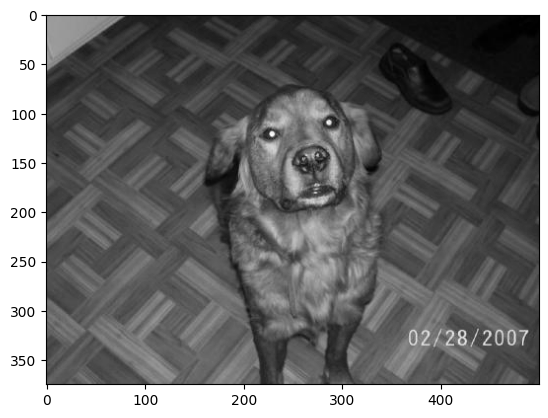

Anjing


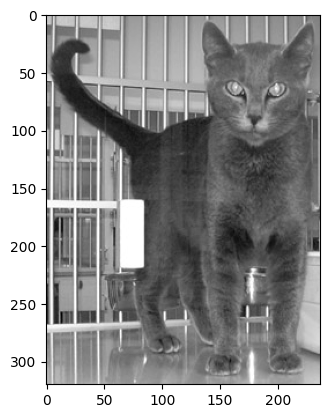

Kucing


In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Modul os berfungsi agar dapat berinteraksi dengan Sistem Operasi
import os
# Modul OpenCV digunakan untuk menbaca dan menampikan gambar
import cv2

DATADIR = "Hewan"
# Di dalam diretori Hewan terdapat subdir Kucing dan Anjing
CATEGORIES = ["Anjing", "Kucing"]

for kategori in CATEGORIES:
    # Masuk ke dalam kategori Hewan>Kucing dan Hewan>Anjing
    masukDirektori = os.path.join(DATADIR, kategori)
    
    """
    Tes apakah direktori dapat dibaca dengan baik.
    Tampilkan ganber di dalam masing-masing direktori (Kucing & Anjing).
    Dan dengan warna Grayscale.
    """
    for gambar in os.listdir(masukDirektori):
        gambarArray = cv2.imread(os.path.join(masukDirektori,gambar), cv2.IMREAD_GRAYSCALE)
        plt.imshow(gambarArray, cmap="gray")
        plt.show()
        # Gunakan break untuk loading hanya 1 gambar
        break
    print(kategori)

In [9]:
# Cek size gambar dengan shape (height, width)
print(gambarArray.shape)

(320, 237)


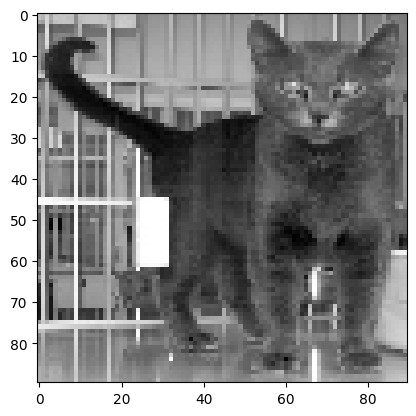

In [11]:
# Resize gambar ke ukuran 90x90 pixel
UKURAN_GAMBAR = 90

arrayBaru = cv2.resize(gambarArray, (UKURAN_GAMBAR, UKURAN_GAMBAR))
plt.imshow(arrayBaru, cmap="gray")
plt.show()

In [28]:
dataTraining = []

def buatDataTraining():
    for kategori in CATEGORIES:
        masukDirektori = os.path.join(DATADIR, kategori)
        # Ambil nomor klasifikasi (0 atau 1), 0 = Anjing dan 1 = Kucing
        nomorKlasifikasi = CATEGORIES.index(kategori)
        for gambar in os.listdir(masukDirektori):
            try:
                gambarArray = cv2.imread(os.path.join(masukDirektori,gambar), cv2.IMREAD_GRAYSCALE)
                # Resize untuk normalisasi ukuran data
                arrayBaru = cv2.resize(gambarArray, (UKURAN_GAMBAR, UKURAN_GAMBAR))
                # Tambah isi list dataTraining
                dataTraining.append([arrayBaru, nomorKlasifikasi])
            except Exception as e:
                pass

buatDataTraining()

In [29]:
print(len(dataTraining))

24946


In [30]:
"""
Selanjutnya mengacak data.
Saat ini semua data hanyalah anjing, kemudian semua kucing.
Ini biasanya akan menyebabkan masalah juga.
Karena pada awalaya, Classifier akan belajar untuk hanya memprediksi anjing
setelah itu memprediksi semua kucing.
Data training perlu diacak.
"""
import random

random.shuffle(dataTraining)

In [71]:
"""
Variabel X dan variabel Y digunaken untuk menyimpan Label dan Feature.
Label berisi karakter A-Z dan 0-9 sedangkan feature berisi data image array masing-masing
label tersebut.
"""
X = []
Y = []

for features, label in dataTraining:
    X.append(features)
    Y.append(label)
"""
Fungsi reshape digunakan untuk memberikan bentuk baru ke array tanpa mengubah datanya.
-1,1 membentuk 1 kolom dengan 1 baris.
"""
X = np.array(X).reshape(-1, UKURAN_GAMBAR, UKURAN_GAMBAR, 1)

In [32]:
# Modul Pickle adalah depedensi yang berfungsi menyinpan file untuk model Data Training.
import pickle

"""
Tulis isi variabel X dan variabel Y ke dalam sebuah file pickle.
File pickle teresbut nanti akan diload ketika proses Training Data.
Pickling adalah cara untuk mengubah objek Python (List, Dict, dll.) menjadi Byte Stream.

wb artinya Writing atau Overwrite apabila terdapat file yang sudah ada.
rb artinya Reading Mode.
Apabila file dibuka untuk ditulis, pickle.dump() mengambil dua argumen : objek yang ingin Anda
kenvert dan file yang objeknya harus disimpan.
Kemudian close file pickle-nya.
"""
pickleOut = open("X.pickle", "wb")
pickle.dump(X, pickleOut)
pickleOut.close()

pickleOut = open("Y.pickle", "wb")
pickle.dump(Y, pickleOut)
pickleOut.close()

In [33]:
# Buka File Pickle
pickleIn = open("X.pickle", "rb")
X = pickle.load(pickleIn)

In [34]:
X[1]

array([[[102],
        [106],
        [ 71],
        ...,
        [ 39],
        [ 48],
        [ 16]],

       [[ 86],
        [107],
        [ 98],
        ...,
        [ 24],
        [ 65],
        [ 29]],

       [[ 70],
        [108],
        [ 99],
        ...,
        [ 19],
        [ 42],
        [ 16]],

       ...,

       [[190],
        [198],
        [193],
        ...,
        [201],
        [192],
        [187]],

       [[197],
        [206],
        [207],
        ...,
        [202],
        [193],
        [187]],

       [[188],
        [193],
        [190],
        ...,
        [210],
        [196],
        [182]]], dtype=uint8)

In [63]:
# CONVOLUTIONAL NEURAL NETWORK (CNN)
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import pickle

# Loading objek dari file cbject.
X = pickle.load(open("X.pickle", "rb"))
Y = pickle.load(open("Y.pickle", "rb"))

# 255 adalah value dari gembar Grayscale
X = X/255.0

# MENDEFINISIKAN Y SEBAGAI NUMPY ARRAY
Y = np.array(Y)

# Untuk memulai Neural Network model dengan Keras digunakan fungsi Sequential()
model = Sequential()
"""
Conv2D adalah 2D Convolution Layer.
Layer ini membuat sebuah Kernel agar dapat memproduksi keluaran dari Layer Input.
Anda perlu men-setting nilai tergantung pada:
(1) Seberapa kompleks dataset dan (2) Kedalaman Neural Network.
Tapi direkomendasikan memulai dengan filter pada rentang [32, 64, 128] untuk tahap awal.
Bisa ditingkatkan ke [256, 512, 1024] untuk layer yang lebih dalam.
"""
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
"""
ReLU singkatan dari Rectified Linear Unit, yaitu Fungsi Aktivasi yang paling umum digunakan
dalam Neural Networks, terutama di CNN.
"""
model.add(Activation("relu"))
"""
Max Pooling adalah strategi downsampling dalam Convolutional Neural Networks.
Digunakan filter 2x2.
Tahap downsampling merupakan proses untuk menurunkan jumlah piksel
dan menghilangkan sebagian informasi dari citra.
Dengan resolusi citra yang tatap, downsampling menghasilkan ukuran citra yang lebih kecil.
"""
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten akan meratakan semua nilai tensor menjadi tensor 1-D
model.add(Flatten())

"""
Dense Layer adalah lapisan yang terhubung penuh.
Artinya semua neuron dalem lapisan tehubung dengan neuron dalam lapisan berikutnya.
"""
model.add(Dense(64))

model.add(Dense(1))
"""
Fungsi sigmoid akan mengubah nilai input menjadi output antara 0,0 dan 1,0.
Setiep input yang lebih besar dari 1.0 akan ditransformasikan menjadi 1.0,
dan input yang lebih kecil dari 0.0 akan ditransformasikan menjadi 0.0.
"""
model.add(Activation("sigmoid"))
"""
Binary crossentropy adalah fungsi yang digunaken pada masalah yang melibatkan keputusan
ya/tidak (biner).

Pilihan algoritma pengoptimalan untuk model Deep Learning dapat memberikan perbedaan hasil
dalam hitungan menit, jam, dan hari.
Algoritma optimisasi Adam adalah perpanjangan Stochastic Gradient Descent
yang baru-baru ini mengadopsi lebih luas untuk aplikasi Deep Learning dalam Computer Vision
dan Natural Language Processing.
"""
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.fit(X, Y, batch_size=32, epochs=12, validation_split=0.2)

Epoch 1/12
624/624 [==============================] - 422s 674ms/step - loss: 0.6843 - accuracy: 0.5821 - val_loss: 0.6397 - val_accuracy: 0.6329
Epoch 2/12
624/624 [==============================] - 409s 655ms/step - loss: 0.5889 - accuracy: 0.6911 - val_loss: 0.5777 - val_accuracy: 0.7106
Epoch 3/12
624/624 [==============================] - 388s 622ms/step - loss: 0.5279 - accuracy: 0.7412 - val_loss: 0.5071 - val_accuracy: 0.7511
Epoch 4/12
624/624 [==============================] - 408s 654ms/step - loss: 0.4873 - accuracy: 0.7679 - val_loss: 0.5187 - val_accuracy: 0.7419
Epoch 5/12
624/624 [==============================] - 412s 660ms/step - loss: 0.4520 - accuracy: 0.7856 - val_loss: 0.4876 - val_accuracy: 0.7653
Epoch 6/12
624/624 [==============================] - 412s 659ms/step - loss: 0.4288 - accuracy: 0.8011 - val_loss: 0.4915 - val_accuracy: 0.7752
Epoch 7/12
624/624 [==============================] - 410s 657ms/step - loss: 0.4019 - accuracy: 0.8183 - val_loss: 0.4893 -

In [64]:
model.save("cnn7.model")

In [70]:
import cv2
import tensorflow as tf
import numpy as np

def prepare(filepath):
    IMG_SIZE = 90
    gambarArray = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    gambarArray = np.array(gambarArray).astype(np.float32)
    arrayBaru = cv2.resize(gambarArray, (IMG_SIZE, IMG_SIZE))
    return arrayBaru.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("cnn7.model")
# Prediksi dengan gambar kucing/anjing acak yang dismbil dari internet
prediksi = model.predict([prepare('anjing1.jpg')])
print(prediksi)
print((CATEGORIES[int(prediksi[0][0])]))

1/1 [==============================] - 0s 73ms/step
[[0.]]
Anjing
